In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,256 x 248,256 x 249,256 x 250,256 x 251,256 x 252,256 x 253,256 x 254,256 x 255,256 x 256,Subject
0,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,123,124,124,125,125,124,124,123,123,123,...,182,183,179,177,179,182,184,184,184,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,3,3,3,3,3,...,168,175,181,187,195,204,208,213,222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,14,15,17,16,14,16,18,15,17,18,...,0,0,1,0,0,0,1,1,0,0
218,152,153,153,151,147,143,140,139,140,144,...,27,28,29,31,32,33,33,33,32,0
219,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
220,1,1,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,256 x 248,256 x 249,256 x 250,256 x 251,256 x 252,256 x 253,256 x 254,256 x 255,256 x 256,Subject
0,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,123,124,124,125,125,124,124,123,123,123,...,182,183,179,177,179,182,184,184,184,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,3,3,3,3,3,...,168,175,181,187,195,204,208,213,222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,14,15,17,16,14,16,18,15,17,18,...,0,0,1,0,0,0,1,1,0,0
218,152,153,153,151,147,143,140,139,140,144,...,27,28,29,31,32,33,33,33,32,0
219,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
220,1,1,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 180
test_split = 200

train_data = df.iloc[0:train_split, 0:num_col-1]
val_data = df.iloc[train_split:test_split, 0:num_col-1]

train_label = df.iloc[0:train_split, num_col-1:num_col]
val_label = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,:num_col-1]
test_label = df.iloc[test_split:, num_col-1:num_col]

test_data = np.array(test_data)
test_label = np.array(test_label)

test_data = test_data.reshape(len(test_data), 256, 256, 1)
test_data = test_data / 255
test_label = to_categorical(test_label, 13)

print(test_label.shape[1])


13
13


In [4]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_label = np.array(train_label)
val_label = np.array(val_label)

train_data = train_data.reshape(len(train_data), 256, 256, 1)
val_data = val_data.reshape(len(val_data), 256, 256, 1)

print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)


(180, 256, 256, 1)
(180, 1)
(20, 256, 256, 1)
(20, 1)
(180, 256, 256, 1)
(180, 1)
(20, 256, 256, 1)
(20, 1)


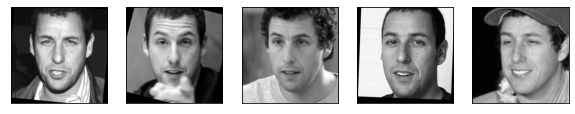

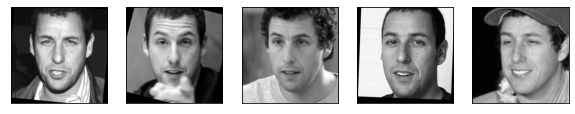

In [8]:
labels = {
    'Adam Sandler': '0',
    'Alyssa Milano': '1',
    'Bruce Willis': '2',
    'Denise Richards': '3',
    'George Clooney': '4',
    'Gwyneth Paltrow': '5',
    'Hugh Jackman': '6',
    'Jason Statham': '7',
    'Jennifer Love Hewitt': '8',
    'Lindsay Lohan': '9',
    'Mark Ruffalo': '10',
    'Robert Downey Jr': '11',
    'Will Smith': '12'
}

plt.figure(figsize=(10,5))
i = 0

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = labels.get(str(train_label[i-1])) 
    plt.imshow(train_data[i-1].reshape((256, 256)), cmap='gray')
    plt.xlabel(label)
    

In [9]:
# normalize data and build categorical labels
train_data = train_data / 255
val_data = val_data / 255

train_label = to_categorical(train_label, 13)
val_label = to_categorical(val_label, 13)


In [14]:
inp = Input((256, 256, 1),)

x = Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 1))(inp)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)
    
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)

x = Dropout(0.4)(x)

out = Dense(13, activation='softmax')(x)

model = Model(inp, out)

In [15]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 126, 126, 16)      4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 63, 63, 16)        0   

In [16]:
#train subject model
history = History()

train_label = model.fit(train_data, train_label, validation_data = (val_data, val_label), epochs=10, batch_size = 8, callbacks = [history])


Epoch 1/10
Epoch 1/10
23/23 [==============================] - 10s 419ms/step - loss: 0.2116 - accuracy: 0.9389 - val_loss: 1.1921e-08 - val_accuracy: 1.0000
Epoch 2/10
Epoch 2/10
23/23 [==============================] - 8s 341ms/step - loss: 3.8771e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
Epoch 3/10
23/23 [==============================] - 8s 333ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
Epoch 4/10
23/23 [==============================] - 8s 334ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
Epoch 5/10
23/23 [==============================] - 7s 316ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
Epoch 6/10
23/23 [==============================] - 7s 319ms/step - loss: 9.9341e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
Epoch 7/10
23/23 [========

Text(0, 0.5, 'Accuracy')

Text(0, 0.5, 'Accuracy')

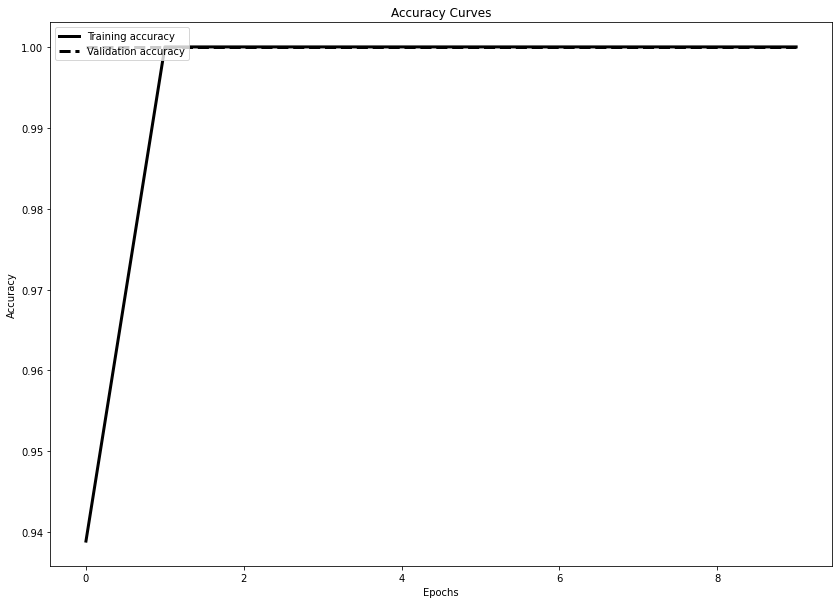

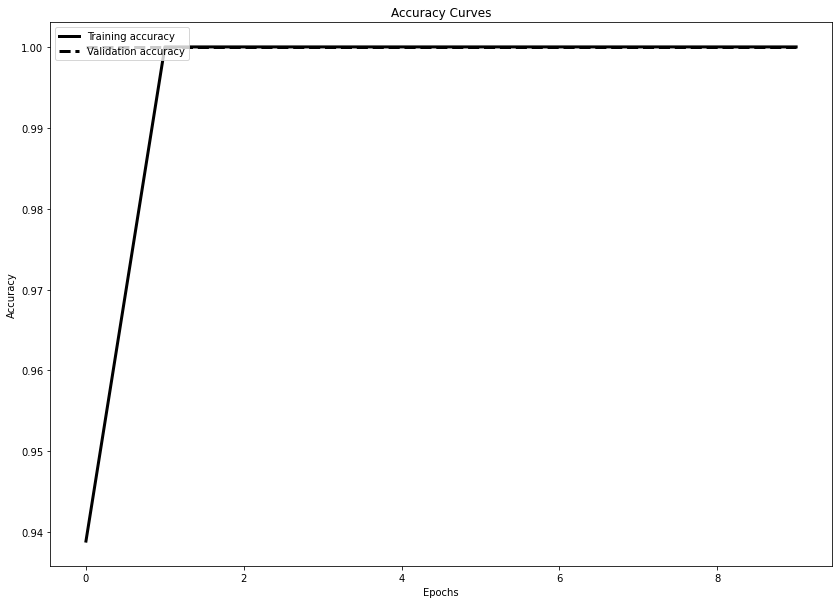

In [17]:
plt.figure(figsize = (14,10))
plt.plot(history.history['accuracy'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_accuracy'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [20]:
model.evaluate(test_data, test_label)


1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

[0.0, 1.0]

,Subject
200,0
201,0
202,0
203,0
204,0
205,0
206,0
207,0
208,0
209,0


,Subject
200,0
201,0
202,0
203,0
204,0
205,0
206,0
207,0
208,0
209,0


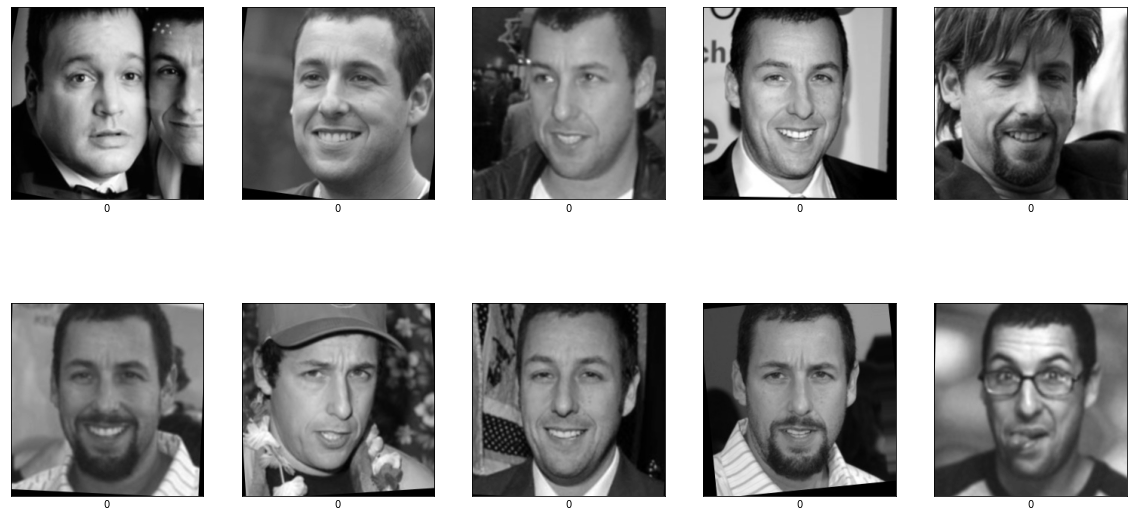

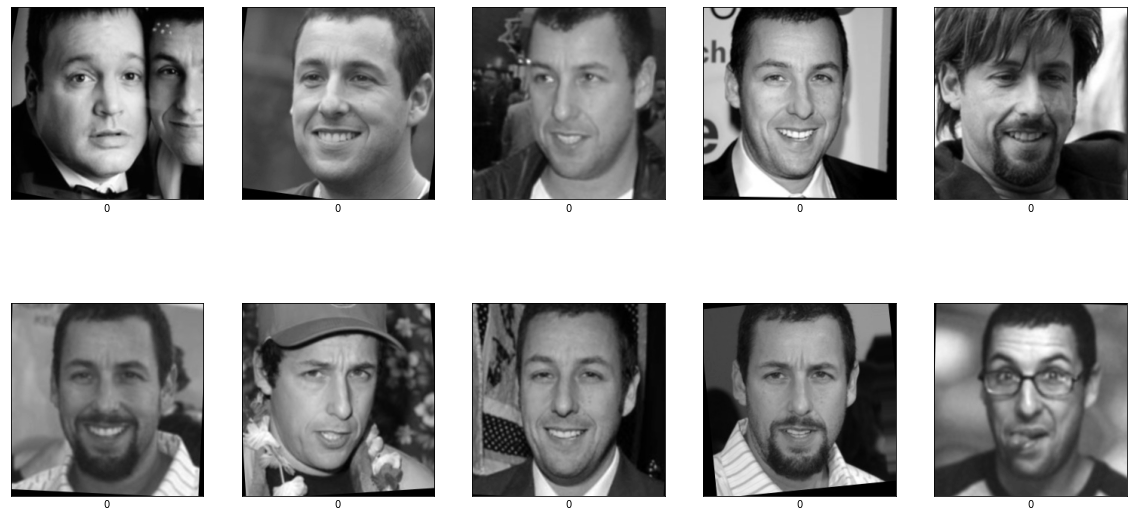

In [21]:
predictions = model.predict(test_data)

predictions = predictions.argmax(axis=-1)

plt.figure(figsize=(20,10))

for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(predictions[i-1])
    plt.imshow(test_data[i-1].reshape(256, 256), cmap='gray')
    plt.xlabel(label)

test_labels = df.iloc[test_split:, num_col-1:num_col]
test_labels.head(10)


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


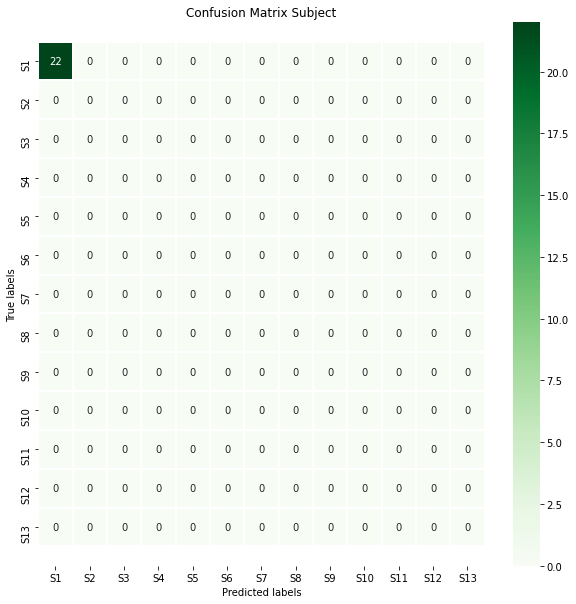

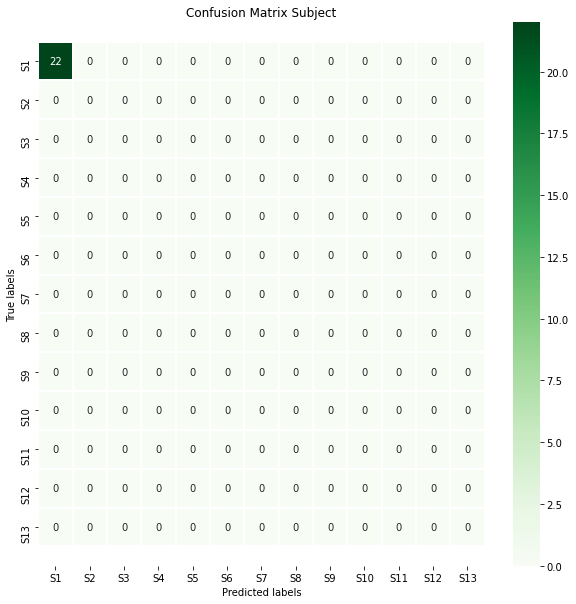

In [23]:
predictions = model.predict(test_data)
predictions = predictions.argmax(axis=-1)

labels = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6','S7', 'S8', 'S9', 'S10', 'S11', 'S12','S13']
test_labels = df.iloc[test_split:, num_col-1:num_col]
cm = confusion_matrix(test_labels, predictions, [0,1,2,3,4,5,6,7,8,9,10,11,12])

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax = ax, linewidths=1, fmt = 'd', cmap="Greens")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Subject'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [ ]:
#save model and architecture to single file
model_subject.save("Model/model_subject.h5")
model_position.save("Model/model_position.h5")

with open('Model/test.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([test_data, test_label, test_labels], f)